In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import openpyxl

ModuleNotFoundError: No module named 'openpyxl'

In [4]:
dates = pd.read_excel('EventStudies_11_march-3 (2).xlsx', sheet_name='Results')
dates = dates.dropna(subset='Acquiror ticker symbol')
print(dates.shape[0])
# dates = dates.drop_duplicates(subset='Acquiror name', keep='first')

1469


0       Russian Federation
1           United Kingdom
3                   France
7                   France
9                   France
               ...        
1462        United Kingdom
1464        United Kingdom
1465        United Kingdom
1467                Sweden
1469        United Kingdom
Name: Acquiror country, Length: 829, dtype: object

In [5]:
dates = dates[(dates.groupby('Acquiror ticker symbol')['Announced date'].diff().fillna(201)>200)]
dates = dates.replace('n.a.', None, regex=True).dropna(subset='Pre-deal acquiror market capitalisation\nEUR')

In [6]:
prices = pd.read_csv('HistoricalPricesАвтоматическиВосстановлено.csv', delimiter=';')

/var/folders/g5/mzy3t8rn7pndp8tlt6b698qc0000gn/T/ipykernel_51429/2854334214.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

In [7]:
prices_final = prices.drop(2).drop(1).dropna(axis=1, how='all')
prices_final.columns = prices_final.iloc[0,:].values
prices_final =prices_final.drop(0)
prices_final = prices_final.loc[:, ~prices_final.columns.duplicated()].replace(',','.', regex=True)

In [8]:
prices_final

,Acquiror ticker symbol,TRN,TRN_copy,BBY,BBY_copy,SOI,SOI_copy,600699,600699_copy,JSG,...,REACH,REACH_copy,OLYMP,OLYMP_copy,ADEN,ADEN_copy,DNZYO,DNZYO_copy,^SXXL,^SXXL_copy
3,NaN,8.545,02.01.2009,29.02,02.01.2009,11.55,12.05.2017,5.82143,16.12.2011,0.0963,...,0.705,15.08.2014,1.2,02.01.2009,1.1,02.01.2009,NaN,NaN,208,01.01.2009
4,NaN,8.6,05.01.2009,30,05.01.2009,11.75,15.05.2017,5.85,19.12.2011,0.1075,...,0.695,18.08.2014,1.2,05.01.2009,1.06,05.01.2009,NaN,NaN,212.77,02.01.2009
5,NaN,8.95,06.01.2009,31.25,06.01.2009,12.03,16.05.2017,5.82143,20.12.2011,0.105,...,0.695,19.08.2014,1.2,07.01.2009,1.04,06.01.2009,NaN,NaN,212.49,05.01.2009
6,NaN,8.34,07.01.2009,29.55,07.01.2009,12.04,17.05.2017,5.72143,21.12.2011,0.1025,...,0.68,20.08.2014,1.1,08.01.2009,1.01,07.01.2009,NaN,NaN,212.76,06.01.2009
7,NaN,8.49,08.01.2009,29.65,08.01.2009,12,18.05.2017,5.58571,22.12.2011,0.1,...,0.67,21.08.2014,1.1,09.01.2009,1,08.01.2009,NaN,NaN,214.36,07.01.2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.35,23.12.2019
2822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.92,24.12.2019
2823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.94,27.12.2019
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.22,30.12.2019


In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [11]:
def nearest(items, pivot):

        d = min([i for i in items if i >= pivot], key=lambda v: abs(v - pivot), default=0)

        return d


In [13]:
def caar_calc(prices_df, dates_df, start, end):


    final_results = pd.DataFrame()
    
    
    stoxx_prices = prices_df[["^SXXL", '^SXXL_copy']].rename(columns={'^SXXL_copy':'date'})
    
    for company in dates_df['Acquiror ticker symbol']:
        company = str(company)
        try:
            company_prices = prices_df[[company, company+'_copy']].rename(columns={company+'_copy':'date'}).dropna()
        except KeyError:
            print(company)
            continue

        merged_prices=company_prices.merge(stoxx_prices, on='date', how='left').ffill()
        merged_prices['date'] = pd.to_datetime(merged_prices['date'], dayfirst=True)
        merged_prices = merged_prices.set_index('date').astype('float64')
        company_returns = merged_prices.pct_change().dropna().sort_index()


        company_returns['rank'] = np.arange(0, company_returns.shape[0])


        ## Calculate days
        count = (final_results.index==company).sum()

        initial_date = dates_df[dates_df['Acquiror ticker symbol'] == company].reset_index()['Announced date'][count]
        initial_date = pd.to_datetime((initial_date - 25569) * 86400.0, unit='s')
        print(initial_date)
        k = company_returns.index
        final_date = nearest(pd.to_datetime(k), initial_date)
    
    
        if final_date == 0 or (final_date-initial_date).days>2 :
            print('shit')
            continue
    
    
        if initial_date != final_date:
            print(str(initial_date) + " : " + str(final_date))
    
    
        data_rank = company_returns[company_returns.index==final_date]['rank'].values[0]
    
        company_returns['days']=company_returns['rank']-data_rank
        company_returns_final = company_returns.drop(columns=['rank'])
    
    
        company_returns_205 = company_returns_final[(company_returns_final['days']>-256) & (company_returns_final['days']<-5)]
        print(company_returns_205.shape[0])
    
        if company_returns_205.shape[0]<250:
            print('<190')
            continue
    
        Y = company_returns_205[company]
        X = company_returns_205['^SXXL']
        # X = sm.add_constant(X)
        model = stats.linregress(X,Y)
    
    
        alpha = model.intercept
        beta = model.slope
    
    
    
        df_AR = company_returns_final[(company_returns_final['days']>=start) & (company_returns_final['days']<=end)]
    
        df_AR = df_AR.set_index('days')
        # df_AR[company] = df_AR['^SXXL'] - df_AR[company]
        df_AR[company] = df_AR[company] - (alpha + beta * df_AR[company])
    
    
        final_results = final_results.append(pd.DataFrame(df_AR[company]).T)
    return final_results

In [14]:
final_results = caar_calc(prices_final, dates, -10, 10)

2012-12-12 00:00:00
250
2015-02-05 00:00:00
250
2015-11-17 00:00:00
shit
2017-12-07 00:00:00
250
2014-10-27 00:00:00
shit
2017-08-21 00:00:00
250
2019-12-19 00:00:00
250
2015-07-29 00:00:00
250
2019-10-02 00:00:00
250
2017-12-05 00:00:00
250
2017-01-27 00:00:00
250
2019-12-06 00:00:00
250
2019-04-14 00:00:00
2019-04-14 00:00:00 : 2019-04-15 00:00:00
250
2018-07-20 00:00:00
250
2016-12-12 00:00:00
250
2017-09-20 00:00:00
shit
2017-06-12 00:00:00
250
2014-06-02 00:00:00
shit
2014-06-26 00:00:00
shit
2015-03-20 00:00:00
250
2016-12-20 00:00:00
250
2013-07-01 00:00:00
250
2018-02-15 00:00:00
250
2014-04-07 00:00:00
250
2014-06-02 00:00:00
shit
2019-07-03 00:00:00
250
2019-05-29 00:00:00
250
2017-07-10 00:00:00
250
2010-12-06 00:00:00
shit
2016-06-21 00:00:00
250
2014-10-16 00:00:00
shit
2016-04-13 00:00:00
250
2015-05-25 00:00:00
250
2018-07-12 00:00:00
shit
2015-07-30 00:00:00
250
2014-03-27 00:00:00
250
2015-04-20 00:00:00
250
2019-06-18 00:00:00
250
2019-11-07 00:00:00
250
2014-01-22 00

In [141]:
final_results = final_results.dropna()

In [142]:
def calc_tstat(results):
    for n in [[-5,5], [-2,2], [-1,1]]:
        AAR = results.loc[:,n[0]:n[1]].mean()
        CAAR = AAR.sum()
        print(str(n[0]) + ' : ' + str(n[1]) + ' t-stat')
        print(str(CAAR) + " : " + str(CAAR/(np.sqrt((AAR.shape[0]-1))*AAR.std())))

In [143]:
calc_tstat(final_results)

-5 : 5 t-stat
0.009162088310255091 : 1.4529423320325088
-2 : 2 t-stat
0.009810351998299043 : 2.513680360072213
-1 : 1 t-stat
0.007910648216301582 : 2.3216592786619645


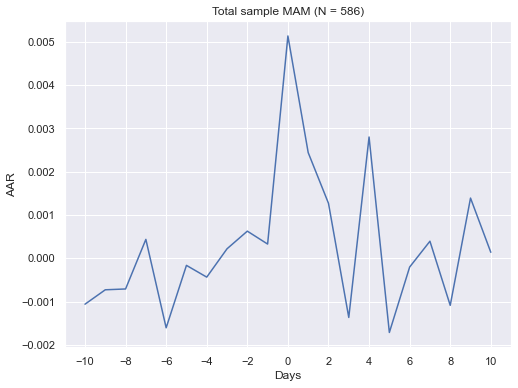

In [144]:
plot_AAR = final_results.mean()

plt.figure(figsize=(8, 6))
plot_AAR.plot()
plt.xticks(np.arange(-10,11,2))

plt.title('Total sample MAM' + ' (N = ' + str(final_results.shape[0]) + ')')
plt.xlabel('Days')
plt.ylabel('AAR')
plt.grid(True)
plt.show()


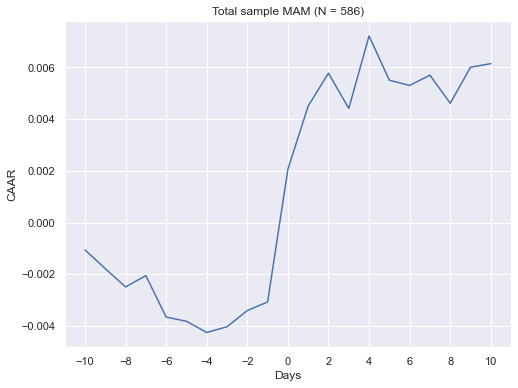

In [145]:


plot_AAR = final_results.mean().cumsum()

plt.figure(figsize=(8, 6))
plot_AAR.plot()
plt.xticks(np.arange(-10,11,2))

plt.title('Total sample MAM' + ' (N = ' + str(final_results.shape[0]) + ')')
plt.xlabel('Days')
plt.ylabel('CAAR')

plt.grid(True)
plt.show()

In [146]:
calc_tstat(final_results.dropna())

-5 : 5 t-stat
0.009162088310255091 : 1.4529423320325088
-2 : 2 t-stat
0.009810351998299043 : 2.513680360072213
-1 : 1 t-stat
0.007910648216301582 : 2.3216592786619645


In [153]:
resultsUK = final_results[final_results.index.isin(dates[dates['Acquiror country'] == 'United Kingdom']['Acquiror ticker symbol'])]
resultsNotUK = final_results[final_results.index.isin(dates[dates['Acquiror country'] != 'United Kingdom']['Acquiror ticker symbol'])]

In [148]:
# T-Stat Results UK MAM
calc_tstat(resultsUK.dropna())

-5 : 5 t-stat
0.007059201667463209 : 1.361809350609968
-2 : 2 t-stat
0.008530681335047387 : 2.6225849578988956
-1 : 1 t-stat
0.005942406519046211 : 2.030081042855516


In [154]:
# T-Stat Results not UK MAM
calc_tstat(resultsNotUK.dropna())

-5 : 5 t-stat
0.011574324357829315 : 1.1312440670547117
-2 : 2 t-stat
0.011275797200685018 : 2.0400646416046433
-1 : 1 t-stat
0.010264973356261205 : 2.288637748732248


In [16]:
# def remove_outliers(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
#     return df

In [168]:
# for col in final_results.loc[:,-5:5].columns:
#     wo_outliers = remove_outliers(final_results.loc[:,-5:5], col)

In [155]:
def calc_positive_ratio(results):
    for n in [[-5,5], [-2,2], [-1,1]]:
        print(str(n) + " : " + str(round((results.loc[:,n[0]:n[1]].sum(axis=1)>0).value_counts(normalize=True)[True]*100, 1))+ "%")


In [158]:
calc_positive_ratio(resultsNotUK.dropna())

[-5, 5] : 47.9%
[-2, 2] : 52.9%
[-1, 1] : 52.9%


In [159]:
cars_5_df = pd.DataFrame(final_results.loc[:, -2:2].sum(axis=1)).reset_index()
cars_5_df.columns = ['Acquiror ticker symbol', 'CAR5d']

In [174]:
dates_car5 = dates.drop_duplicates(subset='Acqui').merge(cars_5_df, on="Acquiror ticker symbol", how='right')

In [175]:
dates_car5.shape[0]

1015

In [179]:
cars_5_df.drop_duplicates(subset='Acquiror ticker symbol')

,Acquiror ticker symbol,CAR5d
0,ROSN,0.007073
1,BT.A,0.017942
2,SAF,-0.011219
3,TTE,0.003677
4,SOLB,-0.004523
...,...,...
581,TAVI,-0.116949
582,VAST,0.018805
583,AEO,0.059505
584,SMG,-0.009184


In [162]:
wo_liablities = dates_car5[~dates_car5['Deal method of payment'].str.contains('Liabilities')]
wo_liablities = wo_liablities[~wo_liablities['Deal method of payment'].str.contains('Bonds')]
wo_liablities = wo_liablities[~wo_liablities['Deal method of payment'].str.contains('Business assets')]
wo_liablities = wo_liablities.replace('Cash Reserves\nCash', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash\nCash Reserves', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash assumed\nCash', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash\nCash assumed', 'Cash', regex=True)


# wo_liablities[(wo_liablities['Deal method of payment'] != 'Cash') & (wo_liablities['Deal method of payment'] != ' Shares')]['Deal method of payment'] = 'Mixed'

wo_liablities.loc[~wo_liablities['Deal method of payment'].isin(['Cash', 'Shares']), 'Deal method of payment'] = 'Mixed'

wo_liablities.rename(columns={'Deal method of payment': 'Method'}, inplace=True)
wo_liablities['Method'].value_counts()

Cash      573
Mixed     230
Shares     80
Name: Method, dtype: int64

In [23]:
dates_car5 = wo_liablities

In [24]:
dates_car5[dates_car5['Acquiror сountry']=='United Kingdom'].shape[0]

KeyError: 'Acquiror сountry'

,Unnamed: 0,Deal Number,Acquiror name,Acquiror country code,Target name,Target country code,Deal type,Deal status,Deal value\nEUR,Acquiror country,...,Acquiror listed,Target listed,Acquiror main exchange,Method,Announced date,Pre-deal acquiror market capitalisation\nEUR,Pre-deal acquiror market capitalisation\nEUR.1,Initial stake (%),Final stake (%),CAR5d
0,1.0,1601409926,NEFTYANAYA KOMPANIYA ROSNEFT OAO,RU,TNK-BP LTD,VG,Acquisition increased from 50% to 100%,Completed,2.143986e+10,Russian Federation,...,Listed,Unlisted,Moscow Exchange MICEX - RTS,Cash,41255,7.168696e+10,7.168696e+10,50.00000,100.00000,0.007073
2,8.0,1909416474,SAFRAN SA,FR,ZODIAC AEROSPACE SA,FR,Acquisition 100%,Completed,7.081397e+09,France,...,Listed,Delisted,Euronext Paris,Mixed,43076,3.582701e+10,3.582701e+10,0.00000,100.00000,-0.011219
4,13.0,1941313935,JUST EAT TAKEAWAY.COM NV,NL,JUST EAT PLC,GB,Acquisition 100% - Bid 2 - Increased offer,Completed,6.747540e+09,Netherlands,...,Listed,Delisted,Euronext Amsterdam,Shares,43818,1.030575e+10,1.030575e+10,0.00000,100.00000,-0.015266
6,17.0,1941278844,FLUTTER ENTERTAINMENT PLC,IE,"STARS GROUP INC., THE",CA,Acquisition 100%,Completed,5.647174e+09,Ireland,...,Listed,Delisted,Euronext Dublin,Shares,43740,8.479820e+09,8.479820e+09,0.00000,100.00000,-0.008663
8,20.0,1909535508,TESCO PLC,GB,BOOKER GROUP PLC,GB,Acquisition 100%,Completed,4.080113e+09,United Kingdom,...,Listed,Delisted,London Stock Exchange,Mixed,42762,1.881445e+10,1.881445e+10,0.00000,100.00000,-0.013967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1461.0,1909614247,LAVIDE HOLDING NV,NL,GASTVRIJ NEDERLAND BV,NL,Acquisition 100%,Completed,1.450000e+05,Netherlands,...,Listed,Unlisted,Euronext Amsterdam,Cash,42941,2.440467e+06,2.440467e+06,0.00000,100.00000,-0.051176
1023,1463.0,1909216685,TAVISTOCK INVESTMENTS PLC,GB,CORNERSTONE ASSET HOLDINGS LTD,GB,Acquisition 100%,Completed,1.380860e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,42095,1.029789e+07,1.029789e+07,0.00000,100.00000,-0.116949
1024,1465.0,1601303406,AFRICAN CONSOLIDATED RESOURCES PLC,GB,AEROMAG.COM LTD,GB,Acquisition 100%,Completed,1.071201e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Shares,40809,3.105435e+07,3.105435e+07,0.00000,100.00000,0.018805
1025,1466.0,1601350301,AEOREMA COMMUNICATIONS PLC,GB,ST16 LTD,GB,Acquisition 100%,Completed,1.037141e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,40977,7.474569e+05,7.474569e+05,0.00000,100.00000,0.059505


In [26]:
import statsmodels.formula.api as smf

In [27]:
dates_car5 = wo_liablities
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  CAR5d   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.577
Date:                Tue, 21 Mar 2023   Prob (F-statistic):             0.0168
Time:                        09:52:42   Log-Likelihood:                 1301.6
No. Observations:                 861   AIC:                            -2527.
Df Residuals:                     823   BIC:                            -2346.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [341]:
results = smf.ols('CAR5d ~ C(Tlist)+ MarCap + LogDV', data = dates_car5).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.018     
Dependent Variable: CAR5d            AIC:                -2547.3802
Date:               2023-03-20 14:05 BIC:                -2528.8259
No. Observations:   764              Log-Likelihood:     1277.7    
Df Model:           3                F-statistic:        5.780     
Df Residuals:       760              Prob (F-statistic): 0.000657  
R-squared:          0.022            Scale:              0.0020759 
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        0.0408    0.0169   2.4104  0.0162   0.0076   0.0740
C(Tlist)[T.1]   -0.0158    0.0073  -2.1549  0.0315  -0.0302  -0.0014
MarCap          -0.0037    0.0010  -3.6167  0.0003  -0.0056  -0.0017
LogDV            0.0022    0.0010   2.2734  0.0233   0.0003   0.0042
-------------------------------------------------------------------
Omnibus:            1240.631      Durbin-Watson:         1.808     
Prob(Omnibus):      0.000         Jarque-Bera (JB):      897933.560
Skew:               9.595         Prob(JB):              0.000     
Kurtosis:           169.851       Condition No.:         271       
===================================================================

"""

In [344]:
dates_car5['Acquiror_country'].value_counts()

United Kingdom        576
France                 25
Sweden                 24
Italy                  16
Spain                  15
Netherlands            14
Poland                 10
Norway                 10
Russian Federation      9
Belgium                 8
Ireland                 7
Germany                 6
Turkey                  4
Switzerland             2
Greece                  2
Malta                   2
Czech Republic          1
Gibraltar               1
Luxembourg              1
Lithuania               1
Iceland                 1
Name: Acquiror_country, dtype: int64

In [330]:
results.t_test_pairwise("C(Year)").result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2011-2010,-0.002803,0.011370,-0.246486,0.805378,-0.025126,0.019521,1.000000,False
2012-2010,0.004267,0.010638,0.401106,0.688465,-0.016620,0.025154,1.000000,False
2013-2010,0.002732,0.009880,0.276507,0.782240,-0.016666,0.022130,1.000000,False
2014-2010,-0.000285,0.010343,-0.027546,0.978032,-0.020592,0.020022,1.000000,False
2015-2010,0.006832,0.009357,0.730072,0.465590,-0.011540,0.025203,1.000000,False
2016-2010,0.012962,0.009933,1.304966,0.192333,-0.006540,0.032464,0.999759,False
2017-2010,-0.003942,0.010024,-0.393221,0.694276,-0.023624,0.015740,1.000000,False
2018-2010,0.000700,0.009966,0.070210,0.944046,-0.018866,0.020266,1.000000,False
2019-2010,0.005389,0.009657,0.558032,0.577001,-0.013571,0.024349,1.000000,False
2012-2011,0.007070,0.010124,0.698332,0.485201,-0.012807,0.026946,1.000000,False


In [302]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ImportError: cannot import name 'kruskal' from 'statsmodels.stats.multicomp' (/Users/abuldovi/PycharmProjects/MasterResearch/venv/lib/python3.9/site-packages/statsmodels/stats/multicomp.py)

In [331]:
pairwise = pairwise_tukeyhsd(dates_car5['CAR5d'], dates_car5['Year'])
pairwise.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2010,2011,0.0005,1.0,-0.0344,0.0353,False
2010,2012,0.0053,1.0,-0.027,0.0376,False
2010,2013,0.0057,0.9999,-0.0247,0.036,False
2010,2014,0.0022,1.0,-0.0294,0.0338,False
2010,2015,0.0086,0.9948,-0.0202,0.0375,False
2010,2016,0.015,0.8575,-0.0151,0.0451,False
2010,2017,0.0013,1.0,-0.0293,0.0318,False
2010,2018,0.0054,0.9999,-0.0248,0.0356,False
2010,2019,0.009,0.9939,-0.0206,0.0386,False
2011,2012,0.0048,1.0,-0.0255,0.0352,False


In [234]:
dates_car5['Deal method of payment'].unique()
dates_car5['Deal method of payment'].isin()

0                           Cash
1      Liabilities\nCash\nShares
2                          Mixed
3            Liabilities\nShares
4                         Shares
                 ...            
872      Mixed\nDeferred payment
873                       Shares
874                        Mixed
875                  Cash\nBonds
876                         Cash
Name: Deal method of payment, Length: 877, dtype: object

Cash      509
Mixed     190
Shares     65
Name: Deal method of payment, dtype: int64

In [227]:
pairwise.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0147,0.0204,-0.0271,-0.0023,True


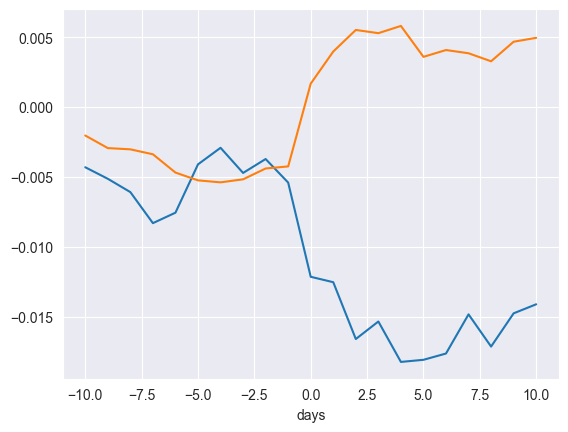

In [52]:
##MM TListed 
listedT = dates_car5.set_index('Acquiror ticker symbol')
listedT_1 = listedT[listedT['Tlist']==1].index
listedT_0 = listedT[listedT['Tlist']==0].index
final_results[final_results.index.isin(listedT_1)].mean().cumsum().plot()
final_results[final_results.index.isin(listedT_0)].mean().cumsum().plot()
plt.show()

<AxesSubplot: xlabel='days'>

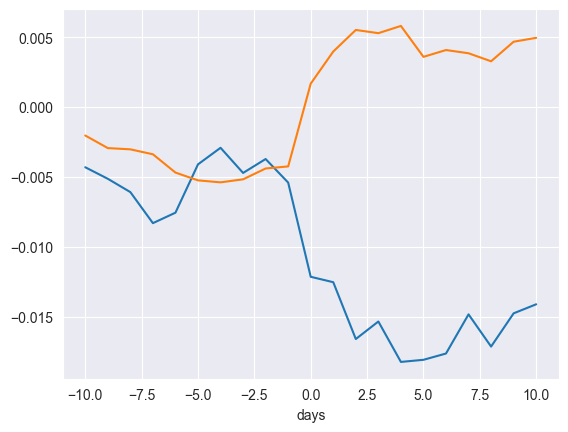

In [200]:
round(dates_car5[['Tlist','RelDum','CrossDum','RelSize','CAR5d']].corr(),2)

,Tlist,RelDum,CrossDum,RelSize,CAR5d
Tlist,1.00,0.09,-0.04,-0.00,-0.08
RelDum,0.09,1.00,0.02,-0.07,-0.00
CrossDum,-0.04,0.02,1.00,-0.02,0.04
RelSize,-0.00,-0.07,-0.02,1.00,0.02
CAR5d,-0.08,-0.00,0.04,0.02,1.00


In [179]:
for country in dates_car5['Acquiror_country'].unique():
    results = smf.ols('CAR5d ~ Tlist+RelDum+CrossDum+RelSize', data = dates_car5[dates_car5['Acquiror_country']==country]).fit()
    print(country)
    print(results.summary())

KeyError: 'Acquiror_country'

In [382]:
dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64')

0       7.168696e+10
1       4.790845e+10
2                NaN
3                NaN
4                NaN
            ...     
3384    3.105435e+07
3385    7.474569e+05
3386    5.256269e+06
3387             NaN
3388    4.467512e+07
Name: MarCap, Length: 3389, dtype: float64

In [139]:
dates_car5['Target listed'].value_counts()

Unlisted                                                      2263
Unlisted\nUnlisted                                             150
Delisted                                                       115
Unlisted\nUnlisted\nUnlisted                                     9
Unlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted                 7
Unlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted       3
Unlisted\nUnlisted\nUnlisted\nUnlisted                           2
Name: Target listed, dtype: int64

In [353]:
profile = dates_car5.profile_report()

In [ ]:
profile